# Logistic Regression Tutorial on Python

website: https://realpython.com/logistic-regression-python/

# Introduction

### What is Logistic Regression?

The function of logistic regression follows any other function of regression ... $f(x) = b_0 + b_1 x_1 + ... + b_r x_4$, also called the **logit**. $b$ represents the **estimatores** or **weights**, or just **coefficients**
The logistic regression function $p(x)$ is the sigmoid function of $f(x)$, defined as follows:

$$p(x) = \frac{1}{1+e^{-f(x)}}$$

This function (p(x)) is interpreted as the probability that the output of a given **x** is equal to 1. Therefore, $1-p(x)$ is interpreted as the probability of a given item to be 0.

***AC Moment***: logistic regression's job is to determine the best weights that make the output $y_i$ as close as possible to actual output. This process of optimization is called **model training** or **fitting**

To have the lowest weights, you need to maximize the log-likelyhood (LLF) function. This is done by a method called maximum likelihood estimation, which is done through the equation.

This is the LLF function: $\Sigma (y_i log(p(x_i)) + (1-y_i)(log(1-p(x_i)))$. In general, when y=1, LLF becomes equal to $y_i log(p(x_i))$, and in this case, you want $p(x_i)$ to be as close to 1 as possible, because if it is close to zero, then $y_i log(p(x_i))$ will be a large negative number. When $y=0$, LLF becomes equal to $log(1-p(x_i))$, and in this case you want $p(x_i)$ to be as close to zero as possible. Simple, to have the maximum likelyhood, you want the $p(x_i)$ to be as close to $y_i$ as possible

If $p(x_i)$ is close to $y=0$, then $log(1-p(x))$ becomes close to 0 

***WOW Moment***: After determining the weights that define the function $p(x)$, you can determine the predicted output of $p(x_i))$ in which the predicted output is 1 if $p(x_1)) > 0.5$ and 0 otherwise. It does not have to be 0.5.

Another relation between $p(x)$ and $f(x)$ is the following equation:

$$f(x) = log(\frac{p(x)}{1-p(x)})$$

There is the normal talk about log regression and how the $p(x)$ function looks like. Interestingly, the $f(x)$ function is just a line, where $f(x) = 0$ when $p(x) = 0.5$ (look at equations above).
There are two figures. The first one is for univariate log regression (normal one), the second one is for two-variable log regression. It does not show a line, but the probabilities of $x$, where $x_1$ is on the x-axis and $x_2$ being on the y axis. The figure represents y values and $f(x_1,x_2)$ at $p(x)=0.5, f(x) = 0$

**Regularization**: this is a method to decrease the amount of overfitting. Basically there are three types of regularization methods:
- L1 regularization: penalizes log-likelihood function based on the sum of absolute values $|b_0|+|b_1| ...$
- L2 regularization: penalizes log-likelihood function based on the sum of squared values: ${b_0}^2+{b_1}^2 ...$
- Elastic-net regularization: a linear combination of both L1 and L2

# Multinomia Logistic Regression

Let's start with: https://dataaspirant.com/how-logistic-regression-model-works/   and    https://dataaspirant.com/difference-between-softmax-function-and-sigmoid-function/

Sigmoid function: $$F(x) = \frac{1}{1+e^{-x}}$$

This function produces an "S" shaped curve, with data points betweeon 0 and 1. Used to classify data into two classes.



Text(0.5, 1.0, 'Sigmoid function for data points from -10.0 to 10.0')

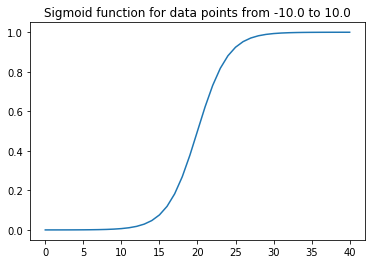

In [25]:
# have a look at sigmoid function
import numpy as np
import matplotlib.pyplot as plt

# create data points
data_points = np.arange(-10,10.1,0.5)

# apply sigmoid function
sigmoid_scores = [1/(1+np.exp(-x)) for x in data_points]

# plot the results
plt.plot(sigmoid_scores)
plt.title(f"Sigmoid function for data points from {data_points[0]} to {data_points[-1]}")

Softmax equation:  $$\delta(z) = \frac{e^{z_j}}{\sum\limits_{k=1}^{k} e^{z_j}}$$

Is used for predicting the classification of data into more than one class. It will always give probabilities between 0 and 1, similar to the sigmoid function. However, it differs in shape, and the probabilities here always sum to 1.

Text(0.5, 1.0, 'Softmax function for data points from 2.069898873020633e-14 to 0.22119921692861125')

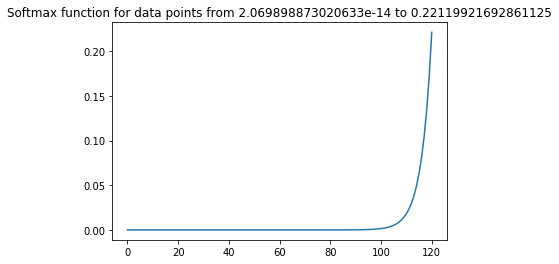

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# create data
data = np.arange(10,40.1,0.25)
data_softmax = np.exp(data)/sum(np.exp(data))

# plot the data
plt.plot(data_softmax)
plt.title(f"Softmax function for data points from {data_softmax[0]} to {data_softmax[-1]}")

In [14]:
# Required Python Packages
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [12]:
# Dataset Path
DATASET_PATH = "/home/asawalma/git/meg-analysis/TPQ/glass.data"

# Glass dataset headers
glass_data_headers = ["Id", "RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe", "glass-type"]
# Loading the Glass dataset in to Pandas dataframe 
glass_data = pd.read_csv(DATASET_PATH, names=glass_data_headers)

print ("Number of observations :: ", len(glass_data.index))
print ("Number of columns :: ", len(glass_data.columns))
print ("Headers :: ", glass_data.columns.values)

Number of observations ::  214
Number of columns ::  11
Headers ::  ['Id' 'RI' 'Na' 'Mg' 'Al' 'Si' 'K' 'Ca' 'Ba' 'Fe' 'glass-type']


In [101]:
# Scatter plot function
def scatter_plot(y, color_scale, labels):
    x = np.arange(0,len(y))
    plt.scatter(x, y, c=color_scale,linewidths =10)
    plt.xlabel(labels[0], fontsize = 16)
    plt.ylabel(labels[1], fontsize = 16)
    cax = plt.axes([0.905, 0.125, 0.05, 0.755])
    plt.colorbar(cax=cax)


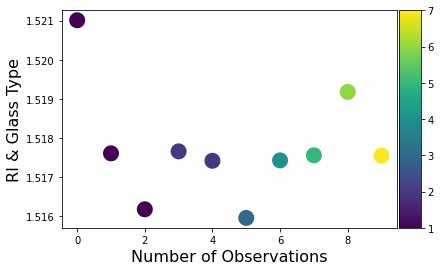

In [498]:
# Have a look at one line in the data
glass_data = pd.read_csv(DATASET_PATH, names=glass_data_headers)
#1. Id number: 1 to 214
#2. RI: refractive index
#3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
#4. Mg: Magnesium
#5. Al: Aluminum
#6. Si: Silicon
#7. K: Potassium
#8. Ca: Calcium
#9. Ba: Barium
#10. Fe: Iron
#11. Type of glass: (class attribute)
#-- 1 building_windows_float_processed
#-- 2 building_windows_non_float_processed
#-- 3 vehicle_windows_float_processed
#-- 4 vehicle_windows_non_float_processed (none in this database)
#-- 5 containers
#-- 6 tableware
#-- 7 headlamps
graph_labels = ["Number of Observations", "RI & Glass Type", "Sample RI - Glass Type Density Graph"] 
scatter_plot(list(glass_data["RI"][:10]), np.array([1, 1, 1, 2, 2, 3, 4, 5, 6, 7]), graph_labels)

/home/asawalma/anaconda3/envs/jumeg_cuda/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


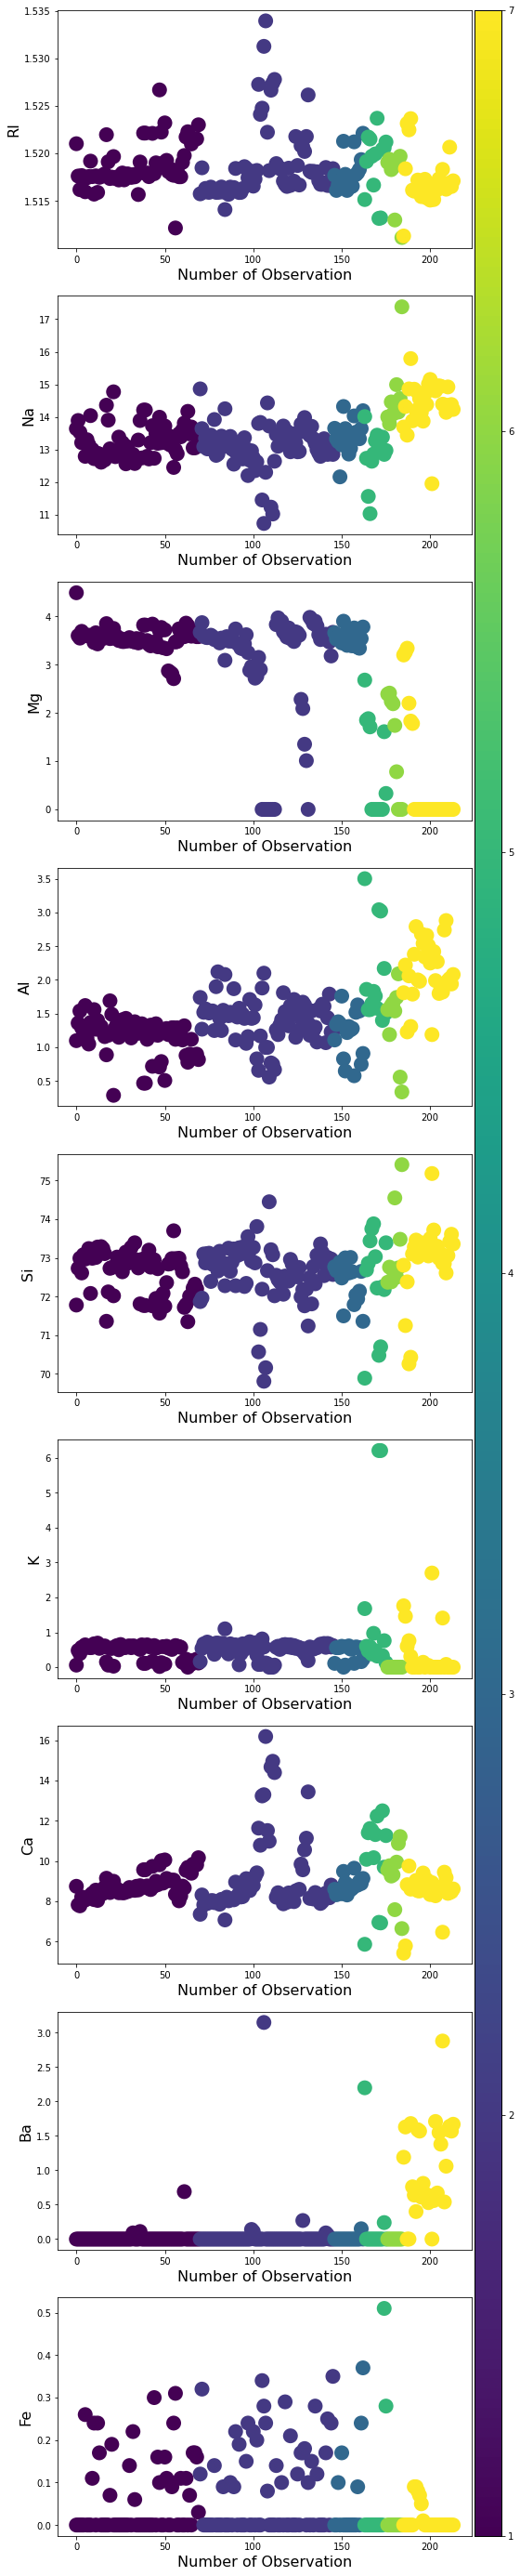

In [499]:
fig = plt.gcf()
fig.set_size_inches(8,50)

glass_data_headers = ["Id", "RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe", "glass-type"]
features_header = glass_data_headers[1:-1]
target_header = glass_data_headers[-1]
for i in range(len(features_header)):
    feature_header = features_header[i]
    plt.subplot(len(features_header),1,i+1)
    layout_headers = ["Number of Observation", feature_header,
                      feature_header + " & " + target_header + " Density Graph"]
    scatter_plot(glass_data[feature_header], glass_data[target_header], layout_headers)

### Split the data into train and test sets
First, we build a multi-classification classifier using log reg classifier from scikit learn

In [591]:
glass_data_headers = ["Id", "RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe", "glass-type"]
glass_data = pd.read_csv(DATASET_PATH, names=glass_data_headers)

train_size = int(0.85 * len(glass_data[glass_data_headers[1:-1]]))
train_x = glass_data[glass_data_headers[1:-1]][0:train_size]
test_x = glass_data[glass_data_headers[1:-1]][train_size::]
train_y = glass_data[glass_data_headers[-1]][0:train_size]
test_y = glass_data[glass_data_headers[-1]][train_size::]

# Train multi-class logistic regression model
lr = linear_model.LogisticRegression(max_iter=5000).fit(train_x, train_y)

# Check at the results
print ("Logistic regression Train Accuracy:   ", lr.score(train_x,train_y))
print ("Logistic regression Test Accuracy:   ", lr.score(test_x,test_y))

#train_x, test_x, train_y, test_y =\
#            train_test_split(glass_data[glass_data_headers[1:-1]], glass_data[glass_data_headers[-1]], train_size=0.7)
# Train multinomial logistic regression
mul_lr = linear_model.LogisticRegression(multi_class='multinomial', solver='newton-cg').fit(train_x, train_y)

print ("Multinomial Logistic regression Train Accuracy:   ", mul_lr.score(train_x,train_y))
print ("Multinomial Logistic regression Test Accuracy:   ", mul_lr.score(test_x,test_y))

Logistic regression Train Accuracy:    0.6408839779005525
Logistic regression Test Accuracy:    0.09090909090909091
Multinomial Logistic regression Train Accuracy:    0.6353591160220995
Multinomial Logistic regression Test Accuracy:    0.09090909090909091


In [592]:
print(len(train_x))
print(len(test_x))

181
33


Second website: https://dataaspirant.com/implement-multinomial-logistic-regression-python/